### 3.6 피마 인디언 당뇨병 예측

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.sample(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
72,13,126,90,0,0,43.4,0.583,42,1
376,0,98,82,15,84,25.2,0.299,22,0
646,1,167,74,17,144,23.4,0.447,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# 결정값? 레이블값?

df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
# p.175
X = df.drop(columns=['Outcome'])
y = df.Outcome

In [7]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [8]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [9]:
X_tranin, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)
# stratify 비율따져야징 한쪽에 0이나 1이 쏠리지 않게
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit (X_tranin, y_train)
#여기서부터 모르겠답...!
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

In [10]:
# 함수 모음
def get_clf_eval(y_test, pred, pred_proba_1):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred_proba_1)
    
    print ('오차행렬')
    print (confusion)
    print (f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}')
    print('--------------------------------')
    
# 머시기 그래프 그리는 함수
def prcision_recall_curve_plot(y_test, pred_proba_1):
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt
    precisions, recalls, thresholds =  precision_recall_curve(y_test, pred_proba_1)
    # x축 임계값에 따른 축 리콜, 프리시즌값 나타내기
    plt.figure(figsize=(5,3))
    threshold_boundary = thresholds.shape[0] 
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precisions') 
    # precisions[0:threshold_boundary] 개수가 하나 차이나서 마지막꺼 뺌
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')
    # x축이 어디부터 어디까지인지...? 음????
    # x축의 시작값이랑 끝값을 start, end에 넣어줌
    start, end = plt.xlim() 
    # x축 눈금을 0.1단위로
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    # 레이블 달기
    plt.xlabel('임계값')
    plt.ylabel('정밀도, 재현율')
    # 범례
    plt.legend()
    # 눈금
    plt.grid()
    # 끄읕!
    plt.show()
    

In [11]:
get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[87 13]
 [22 32]]
정확도: 0.7727, 정밀도: 0.7111, 재현율: 0.5926, F1: 0.6465, AUC: 0.8083
--------------------------------


C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


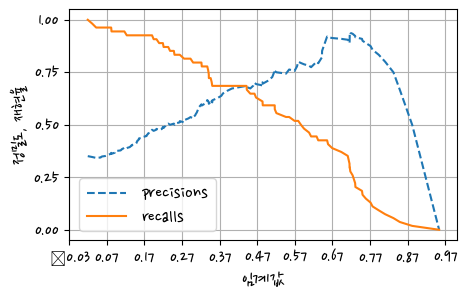

In [12]:
prcision_recall_curve_plot(y_test, pred_proba)

In [13]:
# p.176
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


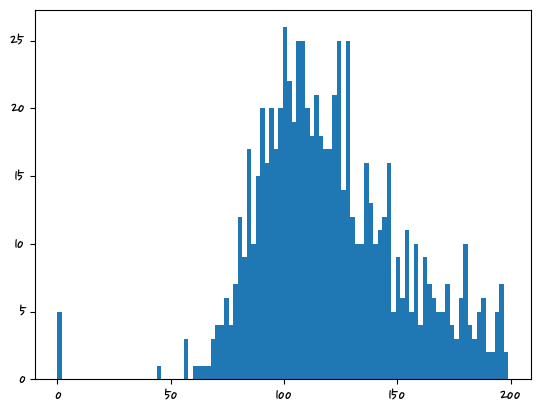

In [14]:
plt.hist(df.Glucose, bins=100)
plt.show()

In [15]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [16]:
# p.177 0인 데이터 개수 세기
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
total_count = df['Glucose'].count()
for feature in zero_features:
    zero_count = df[df[feature]==0][feature].count() # 0인 개수 세기
    print (f'{feature}컬럼의 값이 0인 경우는 {zero_count}건, 비율은 {zero_count/total_count*100}%')

Glucose컬럼의 값이 0인 경우는 5건, 비율은 0.6510416666666667%
BloodPressure컬럼의 값이 0인 경우는 35건, 비율은 4.557291666666666%
SkinThickness컬럼의 값이 0인 경우는 227건, 비율은 29.557291666666668%
Insulin컬럼의 값이 0인 경우는 374건, 비율은 48.69791666666667%
BMI컬럼의 값이 0인 경우는 11건, 비율은 1.4322916666666665%


In [17]:
# p.178
mean_zero_features = df[zero_features].mean()

In [18]:
df[zero_features] = df[zero_features].replace(0,mean_zero_features)
# df[zero_features]에 0을 mean_zero_features값으로 바꿔랑

In [19]:
# 잘 바뀌었는지 다시 확인
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
total_count = df['Glucose'].count()
for feature in zero_features:
    zero_count = df[df[feature]==0][feature].count() # 0인 개수 세기
    print (f'{feature}컬럼의 값이 0인 경우는 {zero_count}건, 비율은 {zero_count/total_count*100}%')

Glucose컬럼의 값이 0인 경우는 0건, 비율은 0.0%
BloodPressure컬럼의 값이 0인 경우는 0건, 비율은 0.0%
SkinThickness컬럼의 값이 0인 경우는 0건, 비율은 0.0%
Insulin컬럼의 값이 0인 경우는 0건, 비율은 0.0%
BMI컬럼의 값이 0인 경우는 0건, 비율은 0.0%


In [20]:
# standard scaler 평균0 분산1인 값으로 변환. p.123

X = df.drop(columns=['Outcome'])
y = df.Outcome
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_tranin, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=156, stratify=y)

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit (X_tranin, y_train)
#여기서부터 모르겠답...!
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test, pred, pred_proba)


오차행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1: 0.6804, AUC: 0.8433
--------------------------------


In [21]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.5] # 재현율 높이기 위해 0.5보다 작은 값으로 보기
def get_eval_by_threshold(y_test, pred_proba_1, thresholds):
    from sklearn.preprocessing import Binarizer
    for custom_threshold in thresholds:
        custom_predict = Binarizer(threshold=custom_threshold).fit_transform(pred_proba_1)
        print (f'임계값: {custom_threshold}')
        get_clf_eval(y_test, custom_predict, pred_proba)
get_eval_by_threshold(y_test, pred_proba.reshape(-1,1), thresholds)

임계값: 0.3
오차행렬
[[65 35]
 [11 43]]
정확도: 0.7013, 정밀도: 0.5513, 재현율: 0.7963, F1: 0.6515, AUC: 0.8433
--------------------------------
임계값: 0.33
오차행렬
[[71 29]
 [11 43]]
정확도: 0.7403, 정밀도: 0.5972, 재현율: 0.7963, F1: 0.6825, AUC: 0.8433
--------------------------------
임계값: 0.36
오차행렬
[[76 24]
 [15 39]]
정확도: 0.7468, 정밀도: 0.6190, 재현율: 0.7222, F1: 0.6667, AUC: 0.8433
--------------------------------
임계값: 0.39
오차행렬
[[78 22]
 [16 38]]
정확도: 0.7532, 정밀도: 0.6333, 재현율: 0.7037, F1: 0.6667, AUC: 0.8433
--------------------------------
임계값: 0.42
오차행렬
[[84 16]
 [18 36]]
정확도: 0.7792, 정밀도: 0.6923, 재현율: 0.6667, F1: 0.6792, AUC: 0.8433
--------------------------------
임계값: 0.45
오차행렬
[[85 15]
 [18 36]]
정확도: 0.7857, 정밀도: 0.7059, 재현율: 0.6667, F1: 0.6857, AUC: 0.8433
--------------------------------
임계값: 0.48
오차행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1: 0.6931, AUC: 0.8433
--------------------------------
임계값: 0.5
오차행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1: 0.6804, AUC: 0.